# Overlap Studies with TA-Lib in Jupyter Notebook

This notebook demonstrates various **Overlap Studies** functions provided by the [TA-Lib](https://mrjbq7.github.io/ta-lib/) library. Each section includes a description of the function, the code to compute it, and a corresponding chart.

## Table of Contents
1. [Setup](#Setup)
2. [Bollinger Bands (BBANDS)](#BBANDS)
3. [Double Exponential Moving Average (DEMA)](#DEMA)
4. [Exponential Moving Average (EMA)](#EMA)
5. [Hilbert Transform - Instantaneous Trendline (HT_TRENDLINE)](#HT_TRENDLINE)
6. [Kaufman Adaptive Moving Average (KAMA)](#KAMA)
7. [Moving Average (MA)](#MA)
8. [MESA Adaptive Moving Average (MAMA)](#MAMA)
9. [Moving Average with Variable Period (MAVP)](#MAVP)
10. [MidPoint over Period (MIDPOINT)](#MIDPOINT)
11. [Midpoint Price over Period (MIDPRICE)](#MIDPRICE)
12. [Parabolic SAR (SAR)](#SAR)
13. [Parabolic SAR - Extended (SAREXT)](#SAREXT)
14. [Simple Moving Average (SMA)](#SMA)
15. [Triple Exponential Moving Average (T3)](#T3)
16. [Triple Exponential Moving Average (TEMA)](#TEMA)
17. [Triangular Moving Average (TRIMA)](#TRIMA)
18. [Weighted Moving Average (WMA)](#WMA)

---

## Setup

First, we need to install and import the necessary libraries. Ensure that TA-Lib is installed in your environment. If not, you can install it using `pip`. Note that installing TA-Lib might require additional system dependencies.



In [9]:
!pip install wget
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=14151f654ea43230cda0fc2cc59cca3fc2a20f45de6c93471a9e79fb4d2b9e3c
  Stored in directory: /Users/loicmancino/Library/Caches/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
zsh:1: command not found: wget
tar: Error opening archive: Failed to open 'ta-lib-0.4.0-src.tar.gz'
[Errno 2] No such file or directory: 'ta-lib/'
/Users/loicmancino/PycharmProjects/scientificProject2/notebooks/ta-libs
zsh:1: no such file or directory: ./configure
make: *** No targets specified and no makefile found.  Stop.
make: *** No rule to make target `install'.  Stop.


In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib

%matplotlib inline

/Users/loicmancino/PycharmProjects/scientificProject2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Download sample data
data = yf.download('AAPL', start='2023-01-01', end='2024-09-17')
data = data[['Close', 'High', 'Low', 'Open', 'Volume']]
data.dropna(inplace=True)
# Display the first few rows
data.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/vk/f0zqgnwn4kbbspdxkgd84my00000gn/T/ipykernel_5388/542812994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09,130.149994,133.410004,129.889999,130.470001,70790800


Bollinger Bands (BBANDS)
Bollinger Bands consist of a moving average and two standard deviation lines above and below it. They are used to identify overbought and oversold conditions.

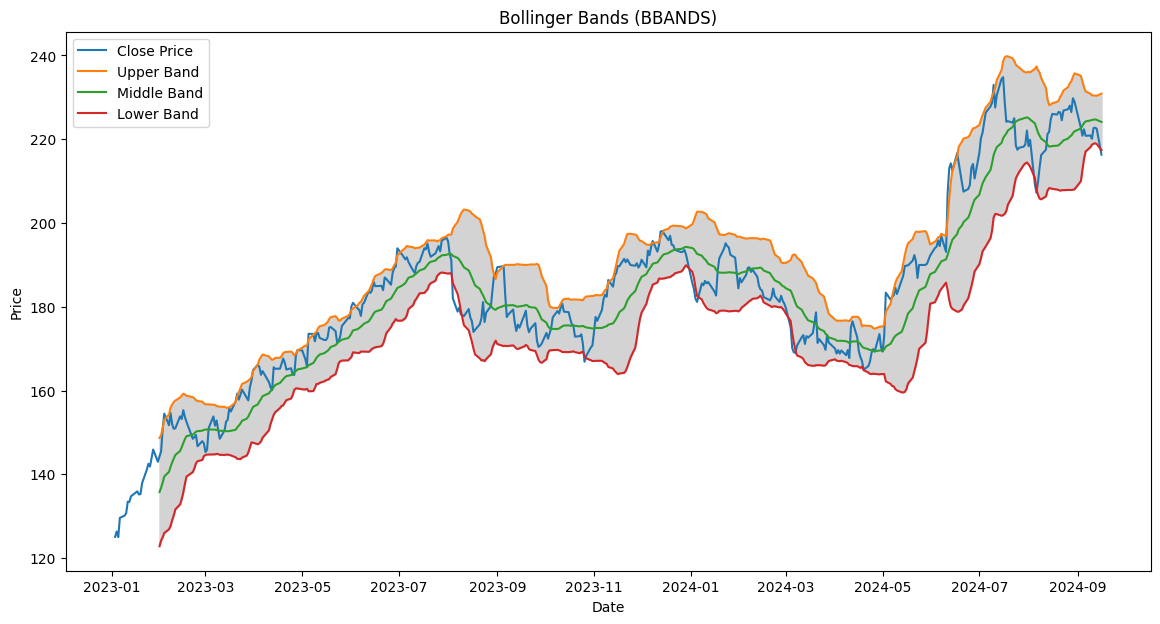

In [3]:
# Compute Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, upper, label='Upper Band')
plt.plot(data.index, middle, label='Middle Band')
plt.plot(data.index, lower, label='Lower Band')
plt.fill_between(data.index, lower, upper, color='lightgrey')
plt.title('Bollinger Bands (BBANDS)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Double Exponential Moving Average (DEMA)
Double Exponential Moving Average (DEMA) reduces the lag of traditional moving averages by applying exponential weighting twice.

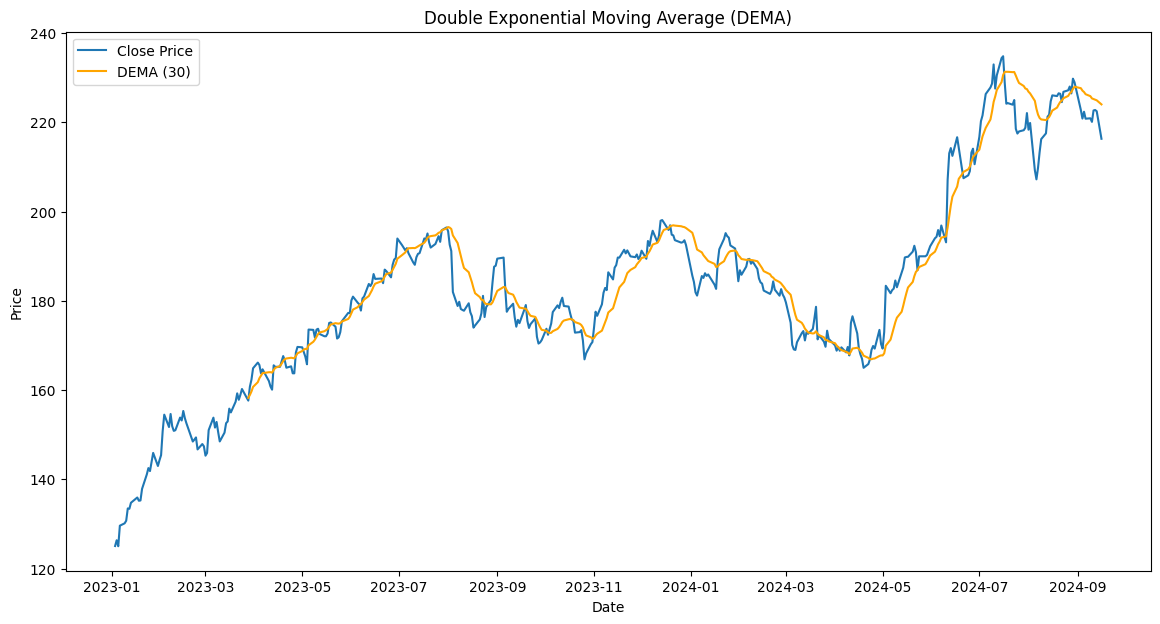

In [4]:
# Compute DEMA
dema = talib.DEMA(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, dema, label='DEMA (30)', color='orange')
plt.title('Double Exponential Moving Average (DEMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Exponential Moving Average (EMA)
Exponential Moving Average (EMA) gives more weight to recent prices, making it more responsive to new information.



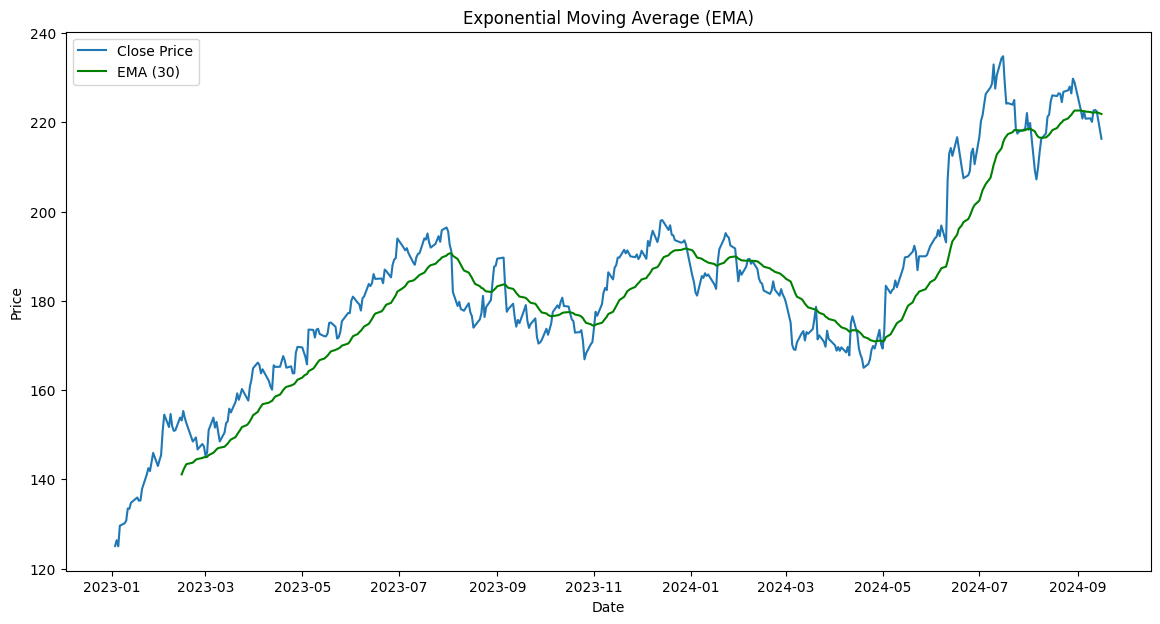

In [5]:
# Compute EMA
ema = talib.EMA(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, ema, label='EMA (30)', color='green')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Hilbert Transform - Instantaneous Trendline (HT_TRENDLINE)
Hilbert Transform - Instantaneous Trendline attempts to determine the trend direction using the Hilbert transform.

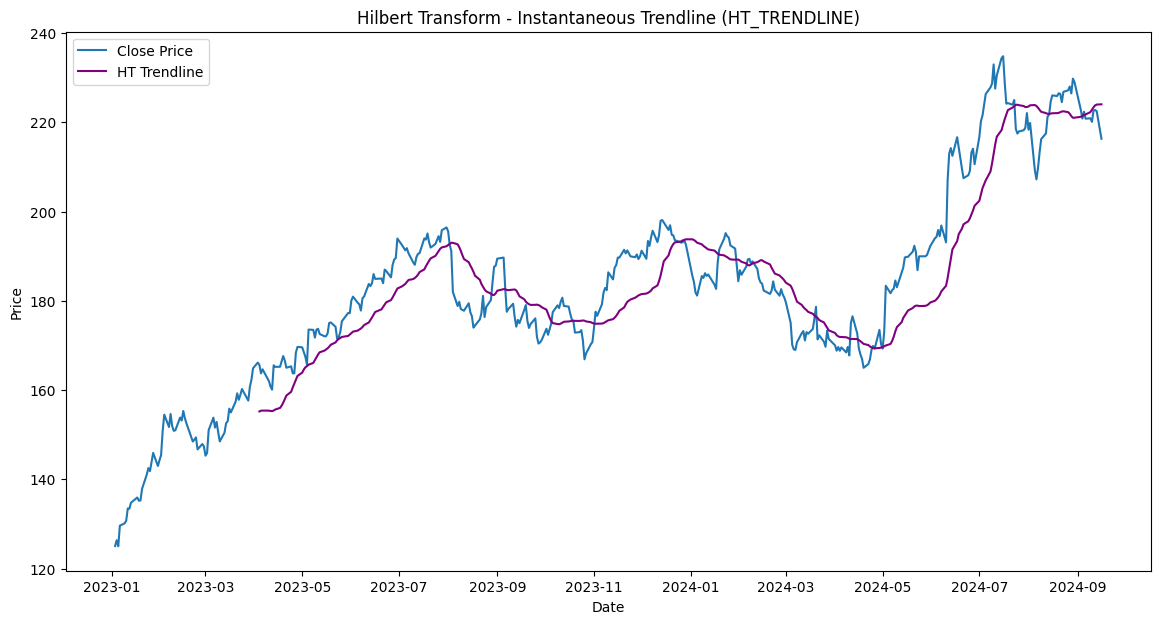

In [6]:
# Compute Hilbert Transform Trendline
trendline = talib.HT_TRENDLINE(data['Close'])

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, trendline, label='HT Trendline', color='purple')
plt.title('Hilbert Transform - Instantaneous Trendline (HT_TRENDLINE)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Kaufman Adaptive Moving Average (KAMA)
Kaufman Adaptive Moving Average (KAMA) is a weighted moving average that is more resistant to recent price changes.

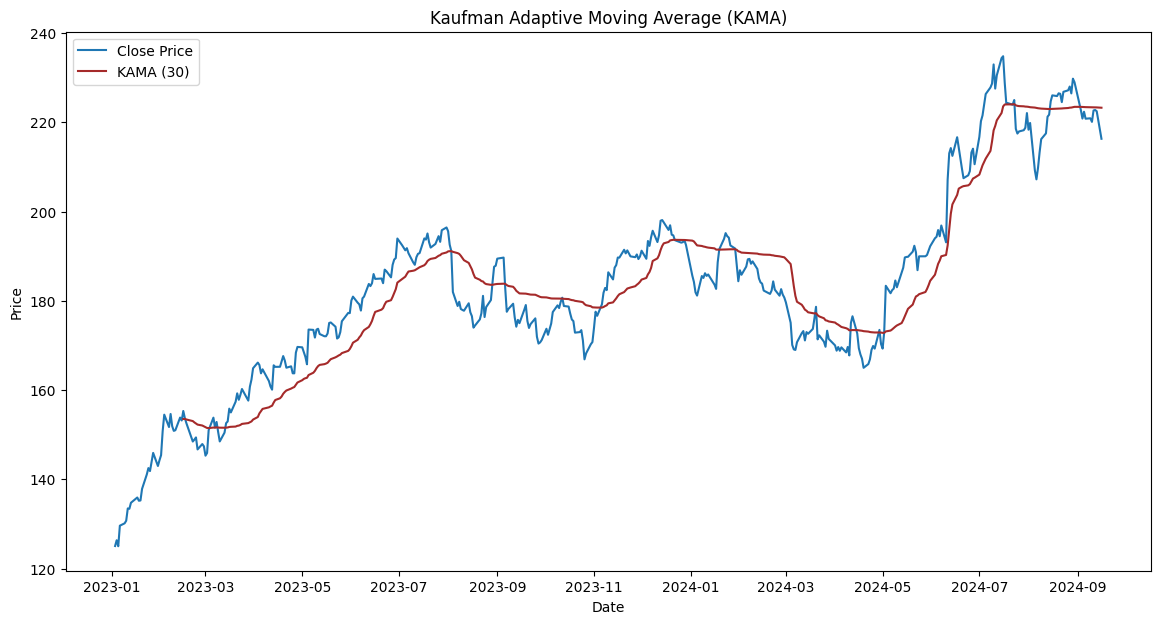

In [7]:
# Compute KAMA
kama = talib.KAMA(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, kama, label='KAMA (30)', color='brown')
plt.title('Kaufman Adaptive Moving Average (KAMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Moving Average (MA) is a generic function that can compute various types of moving averages based on the specified type.

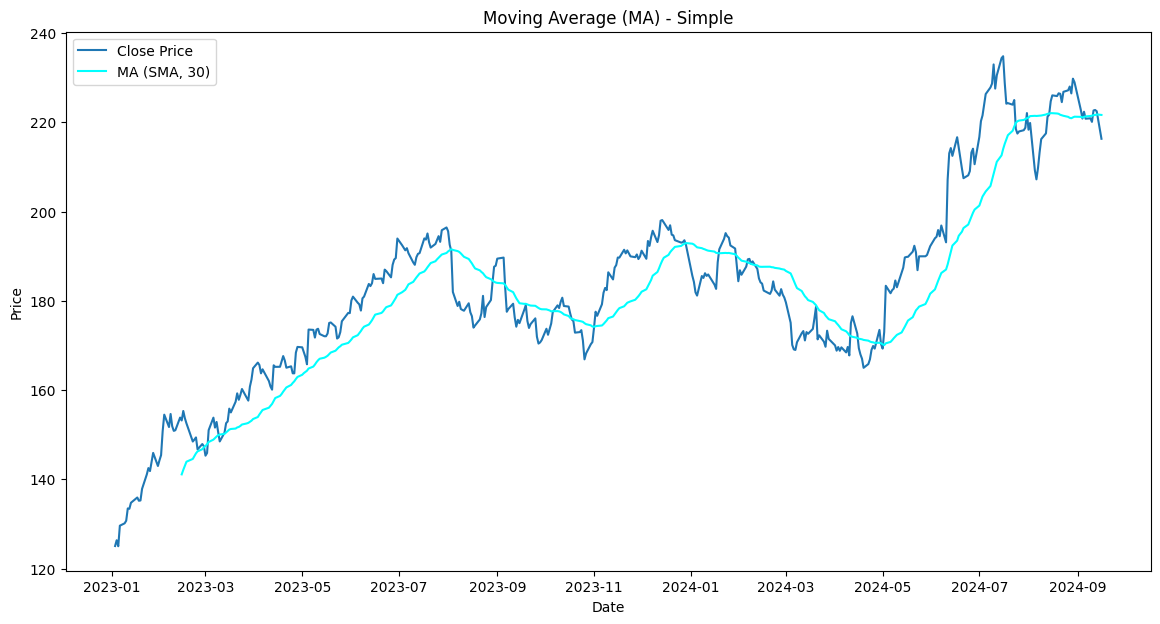

In [8]:
# Compute Simple Moving Average using MA
sma = talib.MA(data['Close'], timeperiod=30, matype=0)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, sma, label='MA (SMA, 30)', color='cyan')
plt.title('Moving Average (MA) - Simple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


MESA Adaptive Moving Average (MAMA)
MESA Adaptive Moving Average (MAMA) adapts to market changes based on the price's moving average.

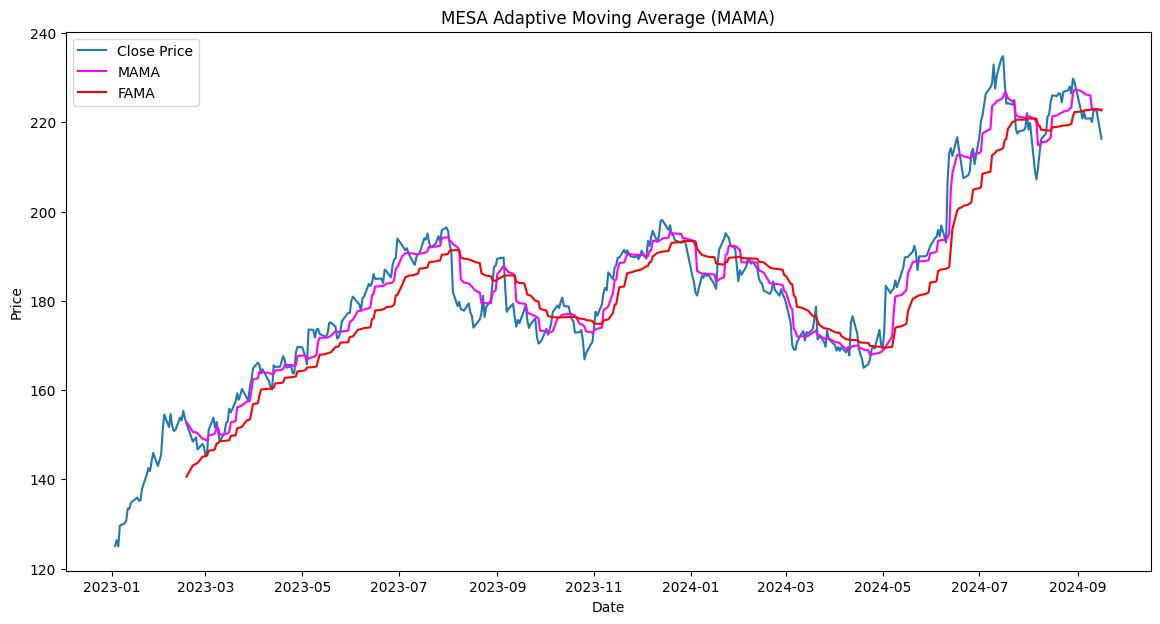

In [9]:
# Compute MAMA and FAMA
mama, fama = talib.MAMA(data['Close'], fastlimit=0.5, slowlimit=0.05)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, mama, label='MAMA', color='magenta')
plt.plot(data.index, fama, label='FAMA', color='red')
plt.title('MESA Adaptive Moving Average (MAMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Moving Average with Variable Period (MAVP)
Moving Average with Variable Period (MAVP) computes a moving average where the period can change dynamically.

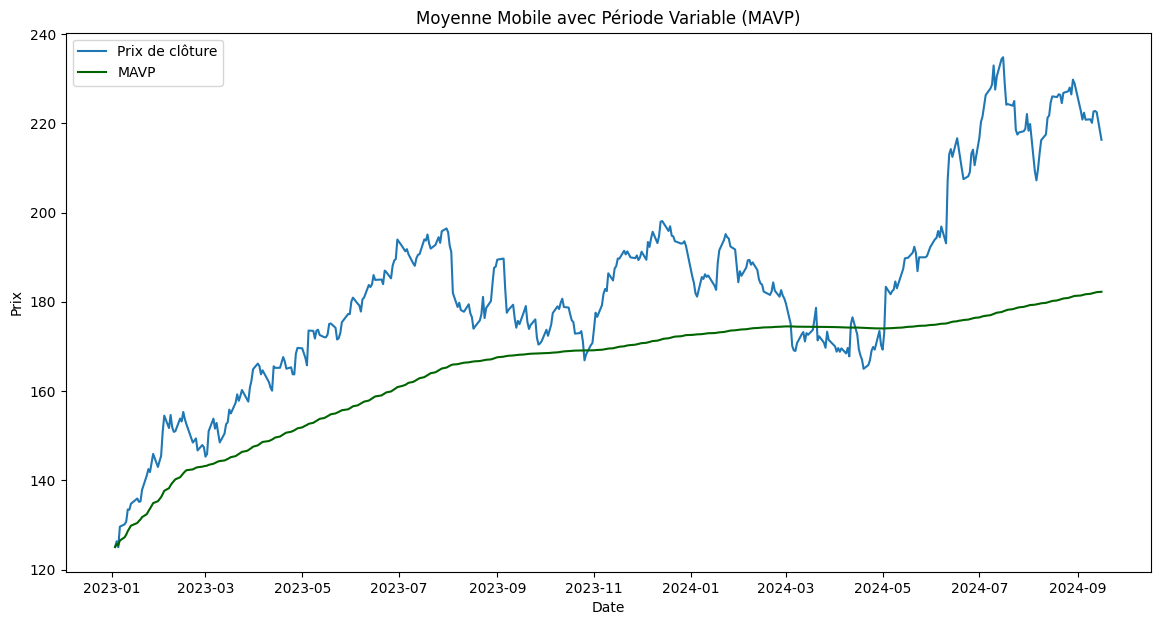

In [11]:
# Définir une période variable, par exemple en utilisant la moyenne mobile de Volume sur 10 jours
variable_period = data['Volume'].rolling(window=10).mean().fillna(10).astype(int)

# Calcul manuel de la Moyenne Mobile avec Période Variable (MAVP)
ma_values = []
for i in range(len(data)):
    period = variable_period.iloc[i]
    if period < 1:
        period = 1
    if i < period:
        ma = data['Close'].iloc[:i+1].mean()
    else:
        ma = data['Close'].iloc[i-period+1:i+1].mean()
    ma_values.append(ma)

data['MAVP'] = ma_values

# Tracer les résultats
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Prix de clôture')
plt.plot(data.index, data['MAVP'], label='MAVP', color='darkgreen')
plt.title('Moyenne Mobile avec Période Variable (MAVP)')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()


MidPoint over Period (MIDPOINT)
MidPoint over Period (MIDPOINT) calculates the midpoint of the highest high and lowest low over a specified period.

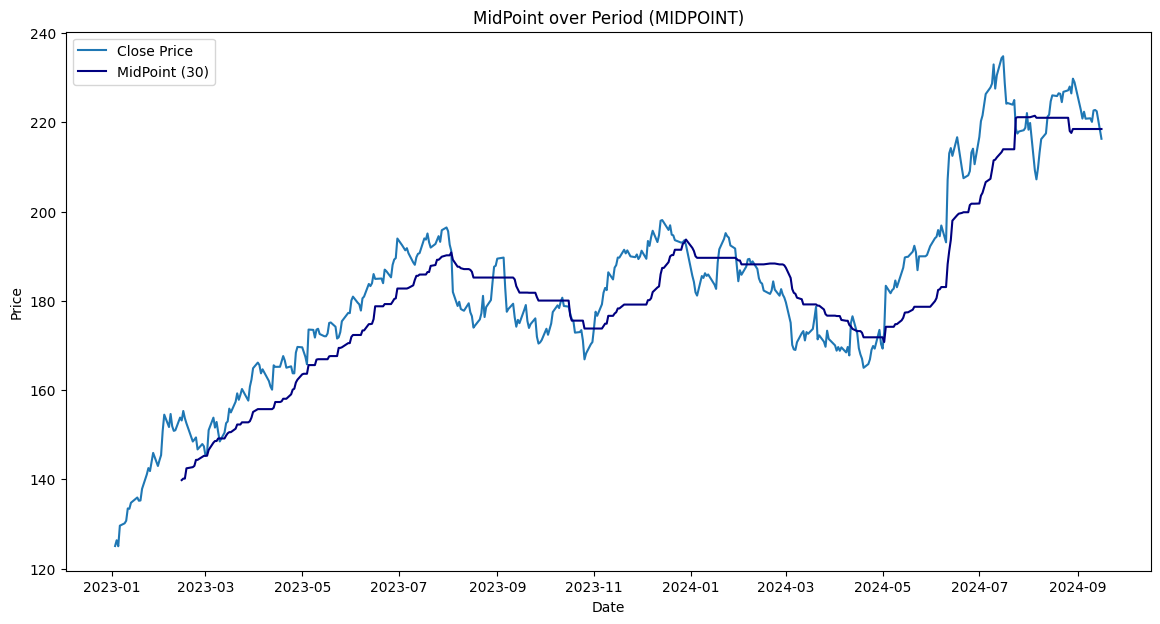

In [12]:
# Compute MidPoint
midpoint = talib.MIDPOINT(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, midpoint, label='MidPoint (30)', color='navy')
plt.title('MidPoint over Period (MIDPOINT)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Midpoint Price over Period (MIDPRICE)
Midpoint Price over Period (MIDPRICE) calculates the average of the highest high and lowest low over a specified period.

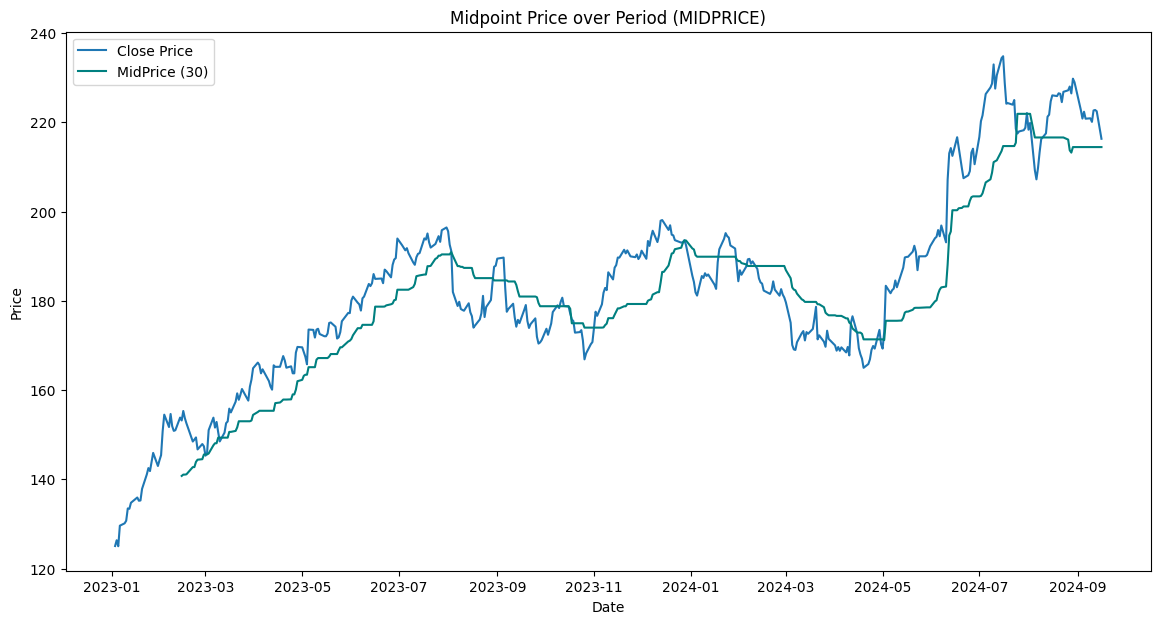

In [13]:
# Compute MidPrice
midprice = talib.MIDPRICE(data['High'], data['Low'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, midprice, label='MidPrice (30)', color='teal')
plt.title('Midpoint Price over Period (MIDPRICE)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Parabolic SAR (SAR)
Parabolic SAR (SAR) is a trend-following indicator that provides potential entry and exit points.

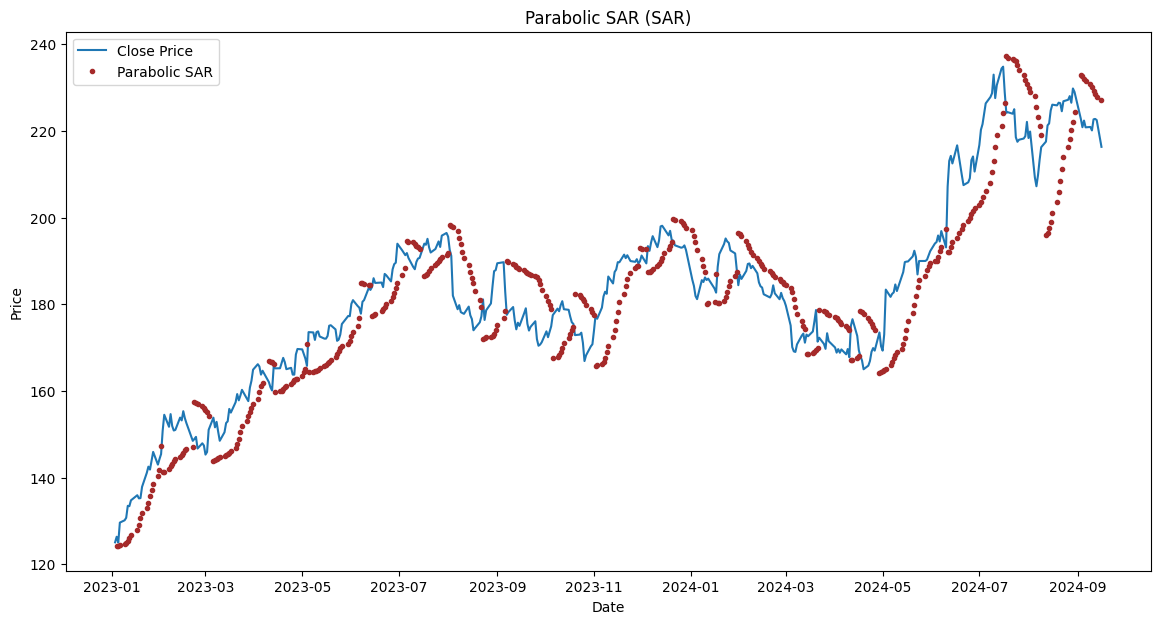

In [14]:
# Compute Parabolic SAR
sar = talib.SAR(data['High'], data['Low'], acceleration=0.02, maximum=0.2)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, sar, label='Parabolic SAR', marker='.', linestyle='None', color='brown')
plt.title('Parabolic SAR (SAR)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Parabolic SAR - Extended (SAREXT) (a vérifier)
Parabolic SAR - Extended (SAREXT) is an extended version of the standard Parabolic SAR with additional parameters for more flexibility.

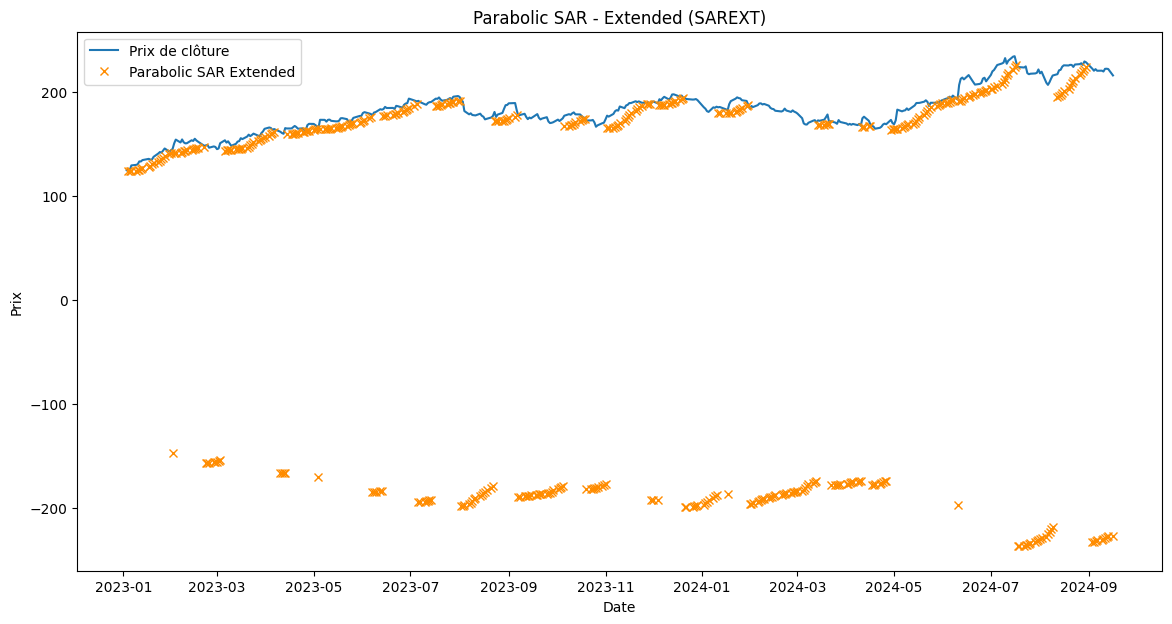

In [23]:
# Calculer le Parabolic SAR Extended sans le paramètre 'startValue'
sarext = talib.SAREXT(
    data['High'],
    data['Low'])

# Tracer les résultats
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Prix de clôture')
plt.plot(data.index, sarext, label='Parabolic SAR Extended', marker='x', linestyle='None', color='darkorange')
plt.title('Parabolic SAR - Extended (SAREXT)')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()


Simple Moving Average (SMA)
Simple Moving Average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.


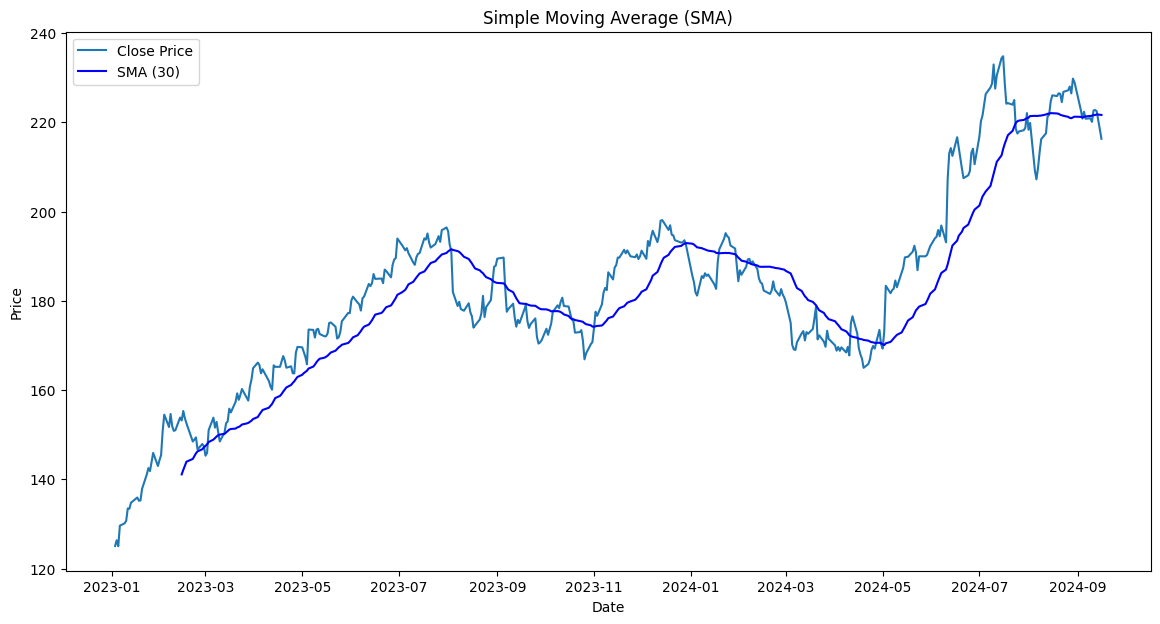

In [24]:
# Compute SMA
sma = talib.SMA(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, sma, label='SMA (30)', color='blue')
plt.title('Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Triple Exponential Moving Average (T3)

Triple Exponential Moving Average (T3) smoothens price data and reduces lag by applying multiple exponential moving averages.

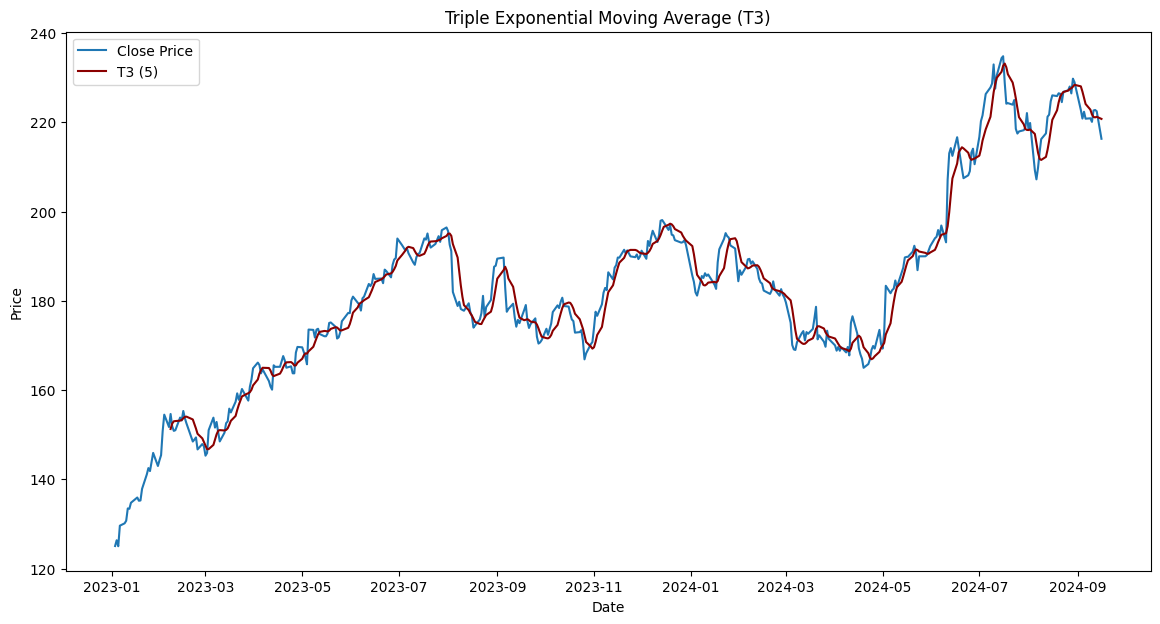

In [25]:
# Compute T3
t3 = talib.T3(data['Close'], timeperiod=5, vfactor=0.7)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, t3, label='T3 (5)', color='darkred')
plt.title('Triple Exponential Moving Average (T3)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Triangular Moving Average (TRIMA)

Triangular Moving Average (TRIMA) applies a double smoothing process, resulting in a smoother moving average.


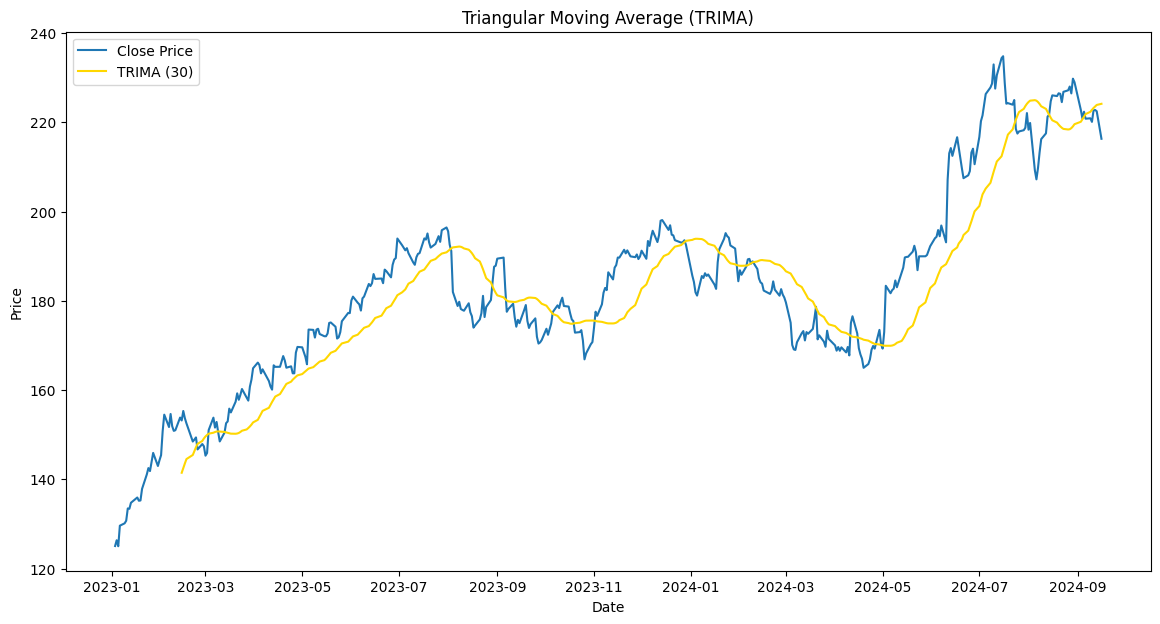

In [26]:
# Compute TRIMA
trima = talib.TRIMA(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, trima, label='TRIMA (30)', color='gold')
plt.title('Triangular Moving Average (TRIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Weighted Moving Average (WMA)
Weighted Moving Average (WMA) assigns more weight to recent data points, making it more responsive to new information compared to SMA.

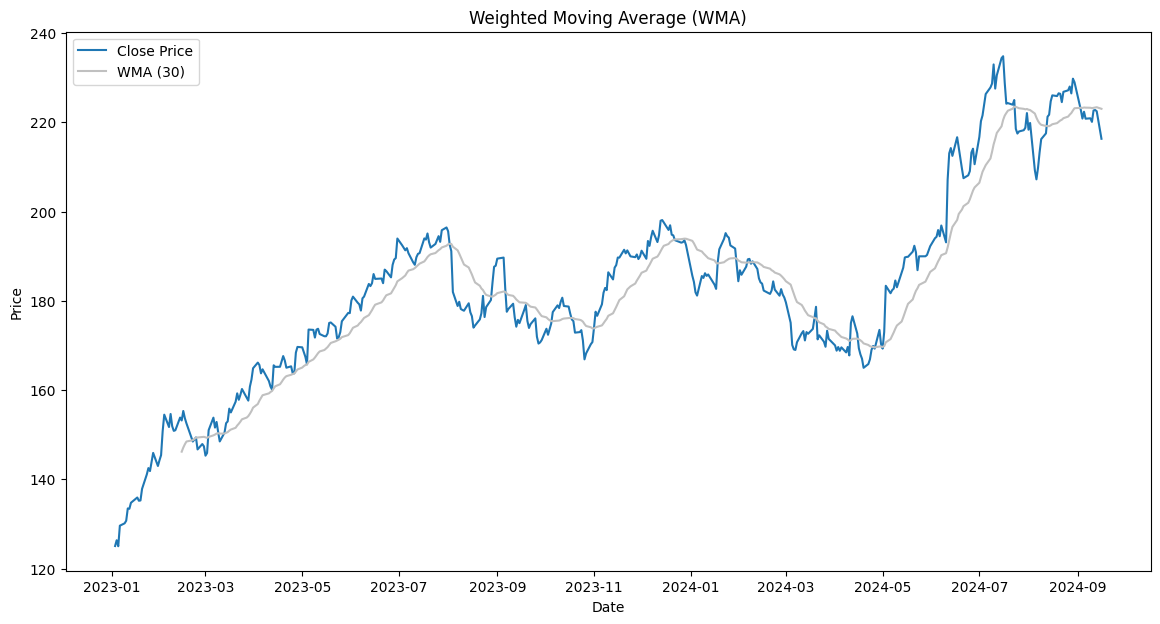

In [27]:
# Compute WMA
wma = talib.WMA(data['Close'], timeperiod=30)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, wma, label='WMA (30)', color='silver')
plt.title('Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
